In [447]:
import pandas as pd # Manipulación y análisis de datos tabulares (filas y columnas).
import numpy as np # Operaciones numéricas y matriciales.
import seaborn as sns # Visualización estadística de datos.
import matplotlib.pyplot as plt # Creación de gráficos y visualizaciones.

In [448]:
from sklearn.decomposition import PCA # Implementación del Análisis de Componentes Principales (PCA).
from sklearn.preprocessing import StandardScaler # Estandarización de datos para análisis estadísticos.

In [449]:
# Cargo las funciones que voy a utilizar
from FuncionesMineria2 import (plot_varianza_explicada, plot_cos2_heatmap, plot_corr_cos, plot_cos2_bars,
                               plot_contribuciones_proporcionales, plot_pca_scatter, plot_pca_scatter_with_vectors,
                               plot_pca_scatter_with_categories)

In [450]:
data = sns.load_dataset("penguins").dropna()
print(data.head())
print(data.info())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_lengt

In [451]:
print(data.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000


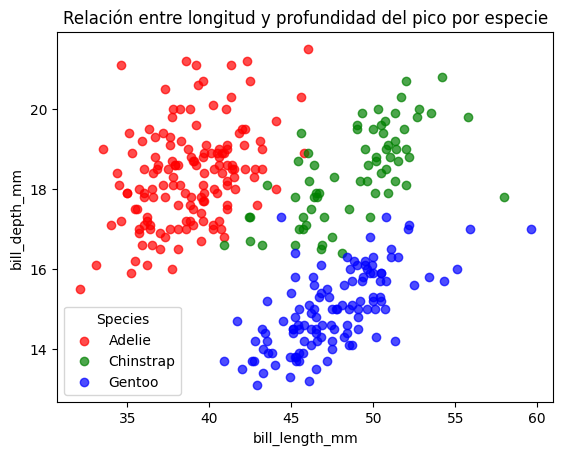

In [452]:
unique_species = data['species'].unique()
colors = ['red', 'green', 'blue']
fig, ax = plt.subplots()
for sp, color in zip(unique_species, colors):
    subset = data[data['species'] == sp]
    ax.scatter(
        subset['bill_length_mm'],
        subset['bill_depth_mm'],
        c=color,
        label=sp,
        alpha=0.7 
    )
ax.set_xlabel('bill_length_mm')
ax.set_ylabel('bill_depth_mm')
ax.set_title('Relación entre longitud y profundidad del pico por especie')
ax.legend(title='Species')
plt.show()

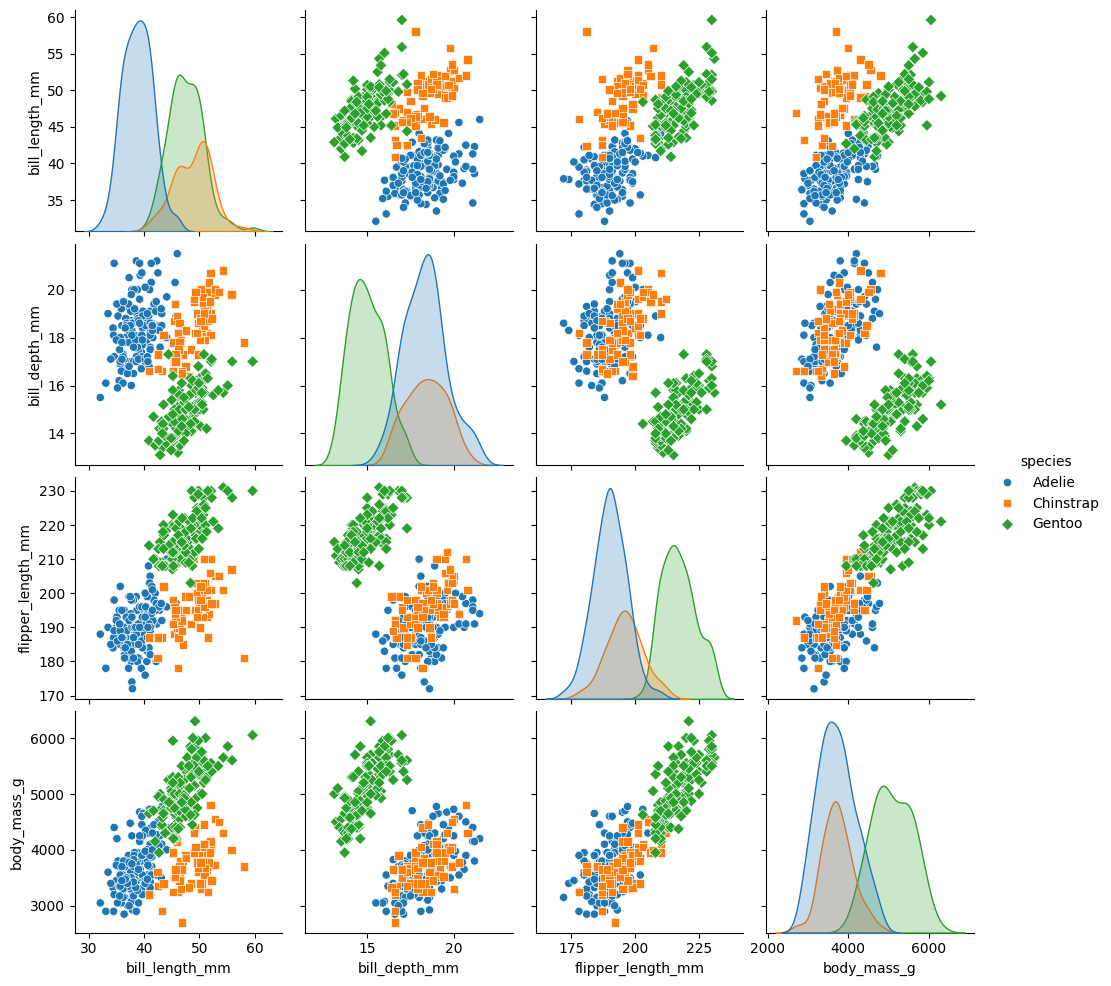

In [453]:
sns.pairplot(data, hue="species", diag_kind="kde", markers=["o", "s", "D"])
plt.show()

In [454]:
# Nos quedamos únicamente con las variables numéricas   
numericas =  data.select_dtypes(include=['int', 'int32', 'int64','float', 'float32', 'float64']).columns
categoricas = [variable for variable in list(data) if variable not in numericas]
data_num = data.drop(columns= categoricas)
variables = list(data_num.columns) 

# Calcula las estadísticas descriptivas para cada variable y crea un DataFrame con los resultados.
estadisticos = pd.DataFrame({
    'Mínimo': data_num[variables].min(),
    'Percentil 25': data_num[variables].quantile(0.25),
    'Mediana': data_num[variables].median(),
    'Percentil 75': data_num[variables].quantile(0.75),
    'Media': data_num[variables].mean(),
    'Máximo': data_num[variables].max(),
    'Desviación Estándar': data_num[variables].std(),
    'Varianza': data_num[variables].var(),
    'Coeficiente de Variación': (data_num[variables].std() / data_num[variables].mean()),
    'Datos Perdidos': data_num[variables].isna().sum()  # Cuenta los valores NaN por variable.
})
display(estadisticos)

,Mínimo,Percentil 25,Mediana,Percentil 75,Media,Máximo,Desviación Estándar,Varianza,Coeficiente de Variación,Datos Perdidos
bill_length_mm,32.1,39.5,44.5,48.6,43.992793,59.6,5.468668,29.906333,0.124308,0
bill_depth_mm,13.1,15.6,17.3,18.7,17.164865,21.5,1.969235,3.877888,0.114725,0
flipper_length_mm,172.0,190.0,197.0,213.0,200.966967,231.0,14.015765,196.441677,0.069742,0
body_mass_g,2700.0,3550.0,4050.0,4775.0,4207.057057,6300.0,805.215802,648372.487699,0.191396,0


In [455]:
# Estandarizamos los datos
data_std = pd.DataFrame(
    StandardScaler().fit_transform(data_num),  # Datos estandarizados
    columns=['{}_z'.format(variable) for variable in variables],  # Nombres de columnas estandarizadas
    index=data_num.index  # Índices (etiquetas de filas) del DataFrame
)
data_std.head()

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
4,-1.335566,1.085877,-0.569284,-0.941606
5,-0.859415,1.747026,-0.783651,-0.692852


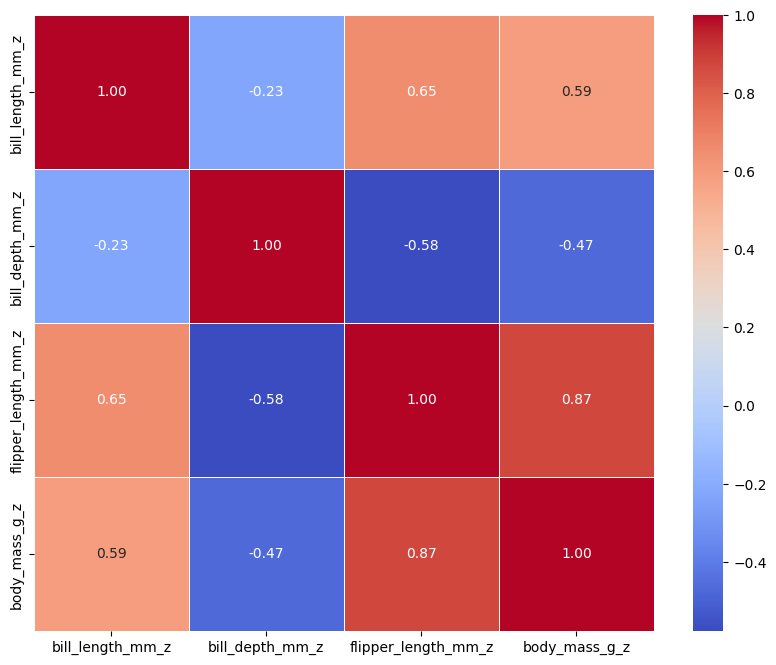

In [456]:
# Cálculo de la matriz de correlaciones
R = data_std.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(R, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [457]:
# Crea una instancia de Análisis de Componentes Principales (ACP):
pca = PCA(n_components=4)
# Aplicar el Análisis de Componentes Principales (ACP) a los datos estandarizados:
fit = pca.fit(data_std)
# Obtener los autovalores asociados a cada componente principal.
autovalores = fit.explained_variance_
# Obtener la varianza explicada por cada componente principal como un porcentaje de la varianza total.
var_explicada = fit.explained_variance_ratio_
# Por ejemplo podemos ver que la varianza explicada por dos CP es:
# var_explicada_2 = np.sum(var_explicada[:1])
# Calcular la varianza explicada acumulada a medida que se agregan cada componente principal.
var_acumulada = np.cumsum(var_explicada)
# Crear un DataFrame de pandas con los datos anteriores y establecer índice.
datos = {'Autovalores': autovalores, 'Variabilidad Explicada': var_explicada, 'Variabilidad Acumulada': var_acumulada}
tabla = pd.DataFrame(datos, index=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)])
print(tabla)

              Autovalores  Variabilidad Explicada  Variabilidad Acumulada
Componente 1     2.753625                0.686339                0.686339
Componente 2     0.780461                0.194529                0.880868
Componente 3     0.369753                0.092161                0.973029
Componente 4     0.108210                0.026971                1.000000


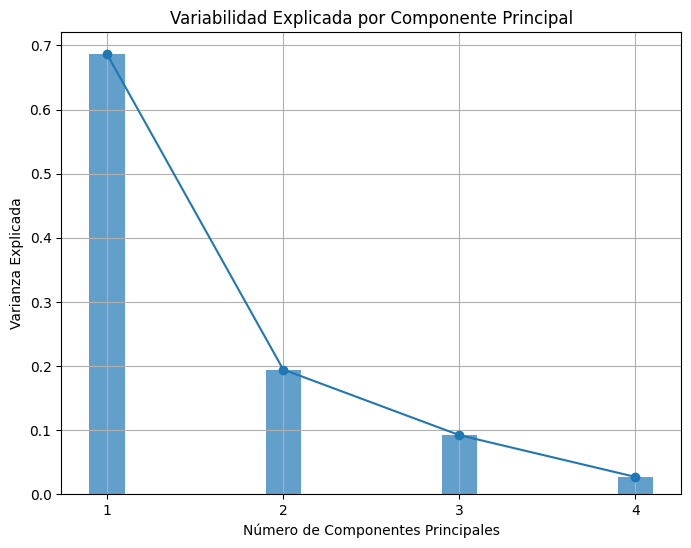

In [458]:
resultados_pca = pd.DataFrame(fit.transform(data_std), 
                              columns=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)],
                              index=data_std.index)


# Representacion de la variabilidad explicada:   
plot_varianza_explicada(var_explicada, fit.n_components_)

In [459]:
# Crea una instancia de ACP con las dos primeras componentes que nos interesan y aplicar a los datos.
pca = PCA(n_components=2)
fit = pca.fit(data_std)
# Obtener los autovalores asociados a cada componente principal.
autovalores = fit.explained_variance_

# Obtener los autovectores asociados a cada componente principal y transponerlos.
autovectores = pd.DataFrame(pca.components_.T, 
                            columns = ['Autovector {}'.format(i) for i in range(1, fit.n_components_+1)],
                            index = ['{}_z'.format(variable) for variable in variables])

# Calculamos las dos primeras componentes principales
resultados_pca = pd.DataFrame(fit.transform(data_std), 
                              columns=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)],
                              index=data_std.index)

# Añadimos las componentes principales a la base de datos estandarizada.
data_z_cp = pd.concat([data_std, resultados_pca], axis=1)

In [460]:
# Cálculo de las correlaciones entre las variables originales y las componentes seleccionadas.
# Guardamos el nombre de las variables del archivo conjunto (variables y componentes).
variables_cp = data_z_cp.columns

# Calculamos las correlaciones y seleccionamos las que nos interesan (variables contra componentes).
correlacion = pd.DataFrame(np.corrcoef(data_std.T, resultados_pca.T), 
                           index = variables_cp, columns = variables_cp)

n_variables = fit.n_features_in_
correlaciones_data_con_cp = correlacion.iloc[:fit.n_features_in_, fit.n_features_in_:]

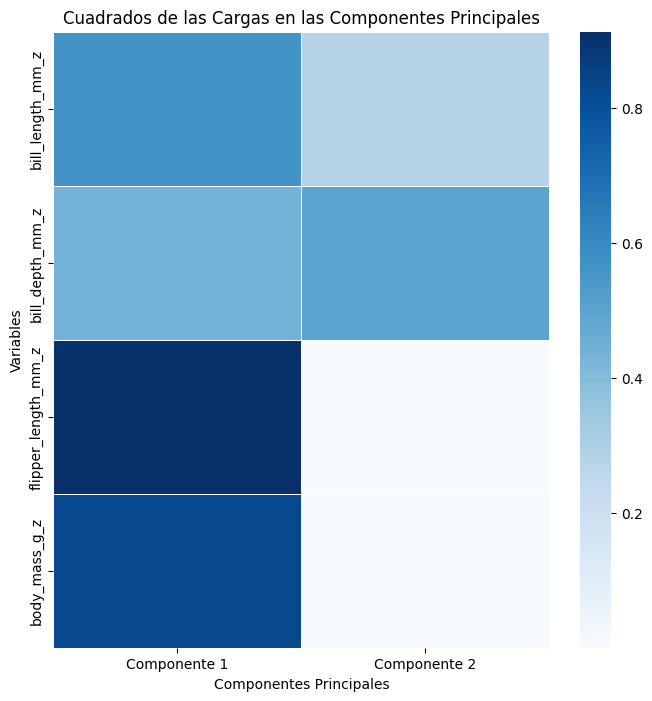

In [461]:
cos2 = correlaciones_data_con_cp **2
plot_cos2_heatmap(cos2)

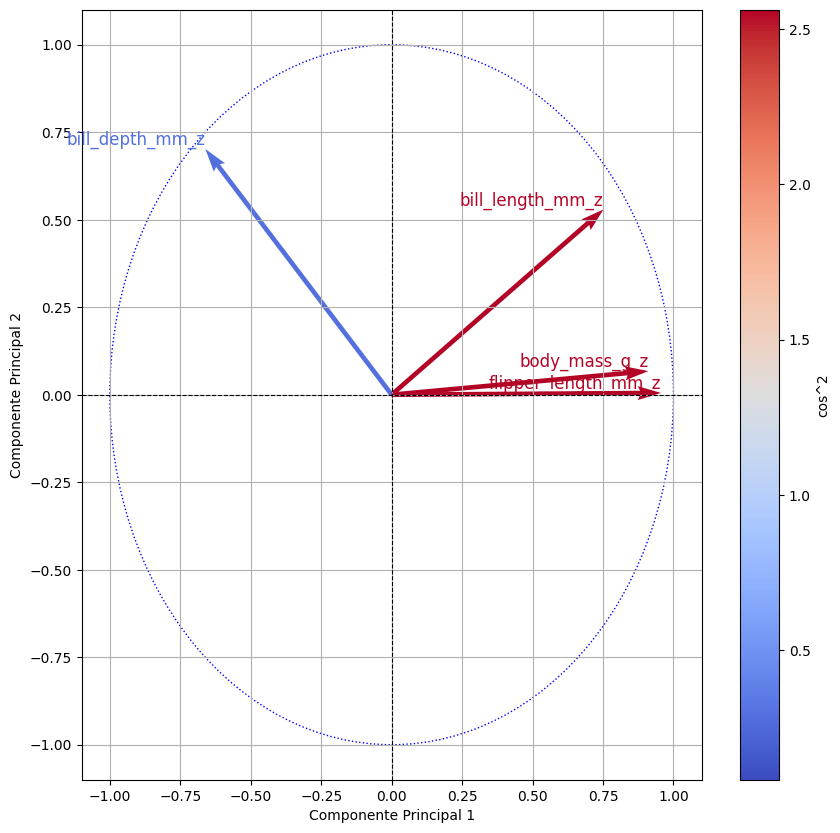

In [462]:
plot_corr_cos(fit.n_components, correlaciones_data_con_cp)

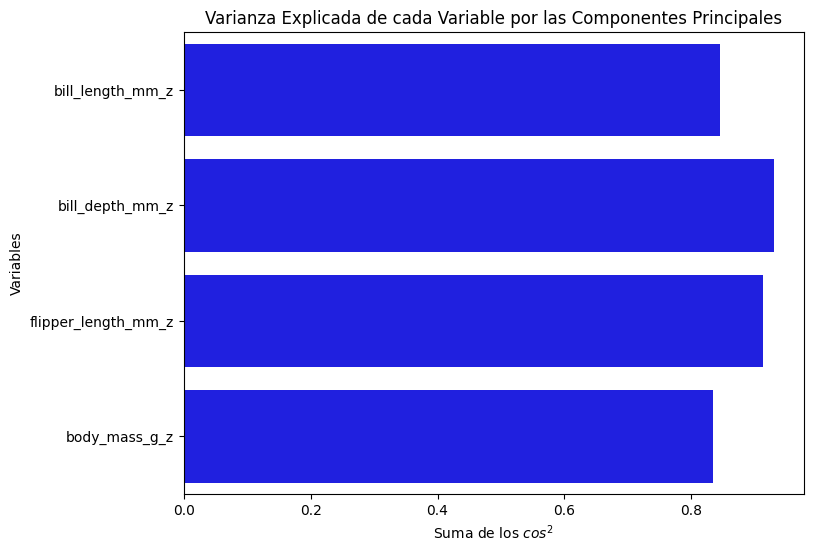

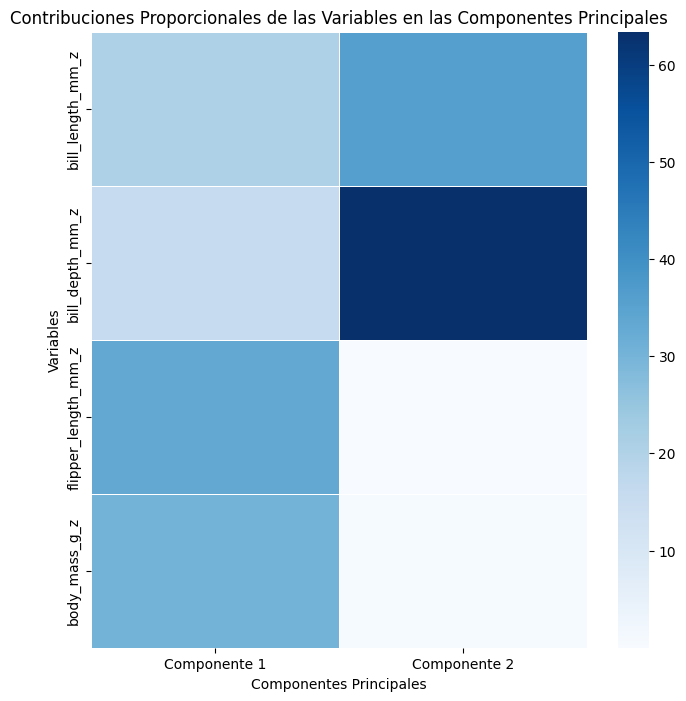

In [463]:
plot_cos2_bars(cos2)
contribuciones_proporcionales = plot_contribuciones_proporcionales(cos2,autovalores,fit.n_components)

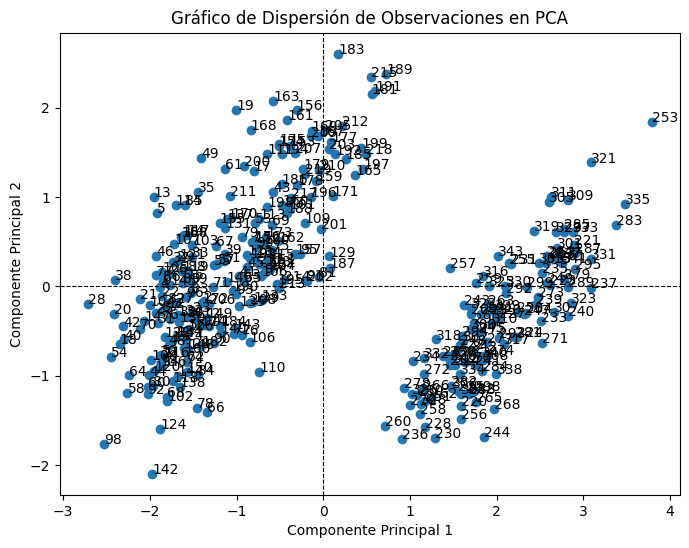

In [464]:
plot_pca_scatter(pca, data_std, fit.n_components)

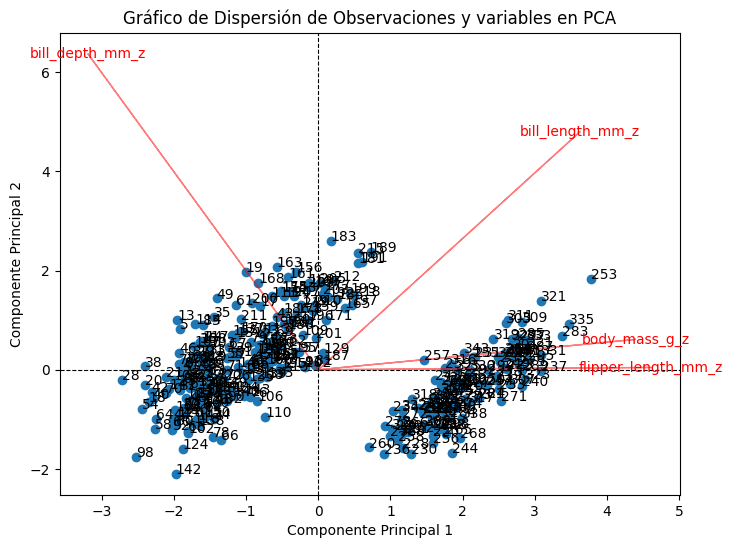

In [465]:
plot_pca_scatter_with_vectors(pca, data_std, fit.n_components, fit.components_)

In [466]:
print(data)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

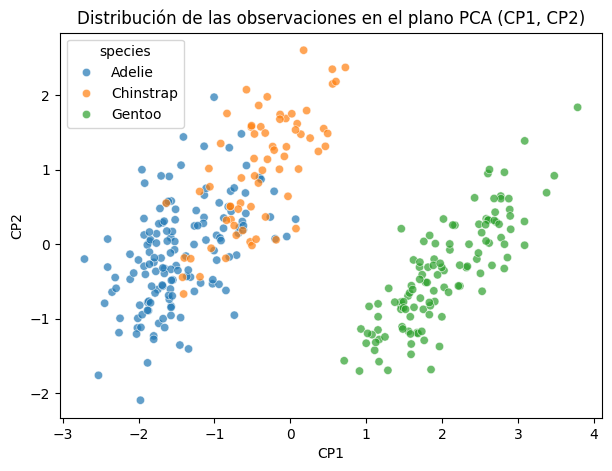

In [467]:
data['CP1'] = resultados_pca['Componente 1']
data['CP2'] = resultados_pca['Componente 2']
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x='CP1', y='CP2', hue='species', alpha=0.7)
plt.title("Distribución de las observaciones en el plano PCA (CP1, CP2)")
plt.show()

In [468]:
 
# Si queremos usar el primer componente como índice, seleccionamos pca.components_[0]
primer_componente = pca.components_[0]  # shape: (4,)

data['Indice_Fisico'] = data_std.values.dot(primer_componente)

# Ahora, podemos calcular el valor medio de ese índice para cada especie
indice_por_especie = data.groupby('species')['Indice_Fisico'].mean()
print("Valor medio del índice físico por especie:")
print(indice_por_especie)

Valor medio del índice físico por especie:
species
Adelie      -1.459721
Chinstrap   -0.388600
Gentoo       2.012976
Name: Indice_Fisico, dtype: float64


In [469]:
from scipy.spatial import distance
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score


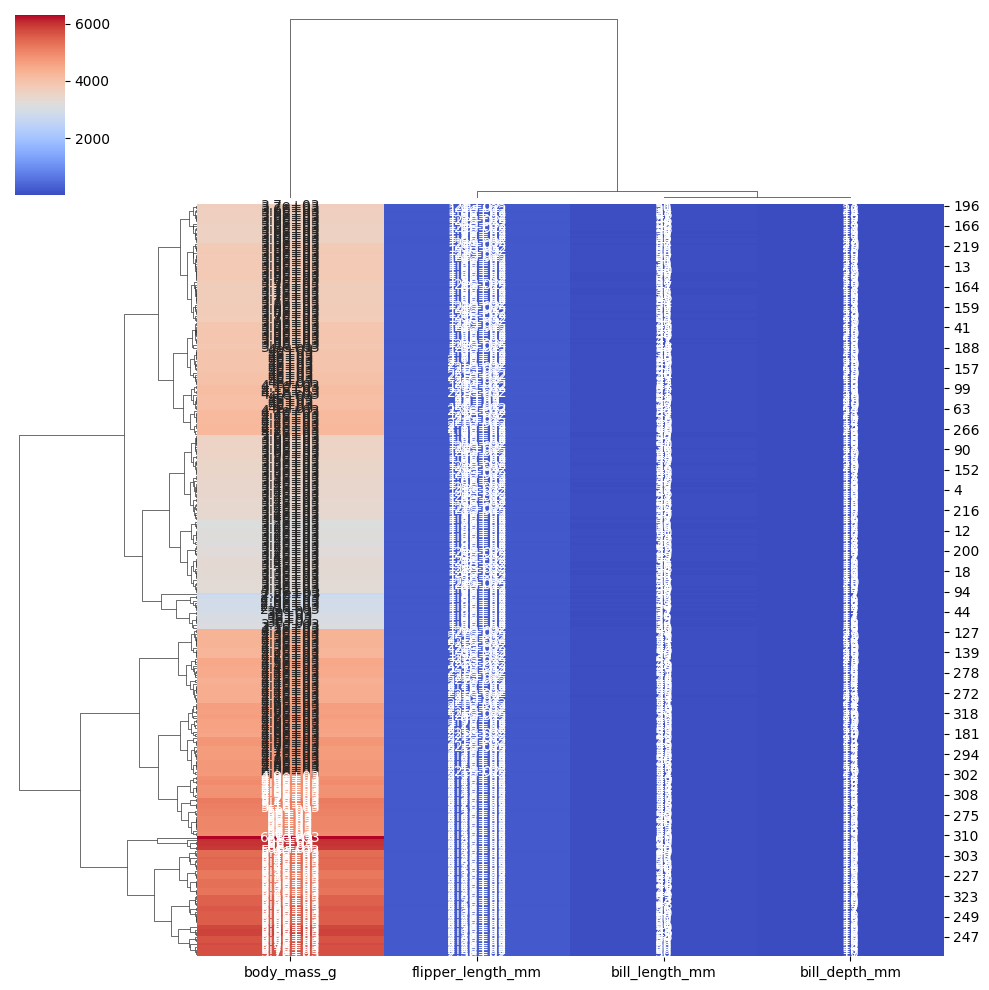

In [470]:
sns.clustermap(data_num, cmap='coolwarm', annot=True)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [471]:
# Calculate the pairwise Euclidean distances
distance_matrix = distance.cdist(data_num, data_num, 'euclidean')

# The distance_matrix is a 2D array containing the Euclidean distances
# between all pairs of observations.
print("Distance Matrix:")
distance_small = distance_matrix[:5, :5]
#Index are added to the distance matrix
distance_small = pd.DataFrame(distance_small, index=data_num.index[:5], columns=data_num.index[:5])

distance_small_rounded = distance_small.round(2)
print(distance_small_rounded)

Distance Matrix:
        0       1       2       4       5
0    0.00   50.27  500.20  300.25  100.42
1   50.27    0.00  550.07  350.09  150.09
2  500.20  550.07    0.00  200.05  400.04
4  300.25  350.09  200.05    0.00  200.04
5  100.42  150.09  400.04  200.04    0.00


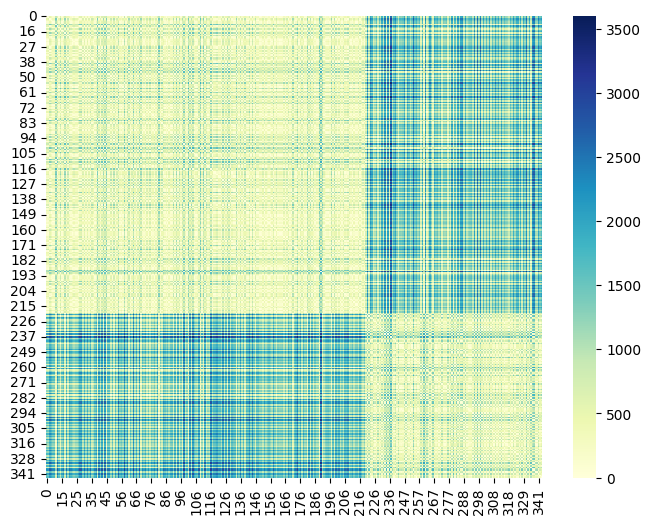

In [472]:
plt.figure(figsize=(8, 6))
data_distance = pd.DataFrame(distance_matrix, index = data_num.index, columns = data_num.index)
sns.heatmap(data_distance, annot=False, cmap="YlGnBu", fmt=".1f")
plt.show()

C:\Users\lrodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\lrodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
C:\Users\lrodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\lrodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n

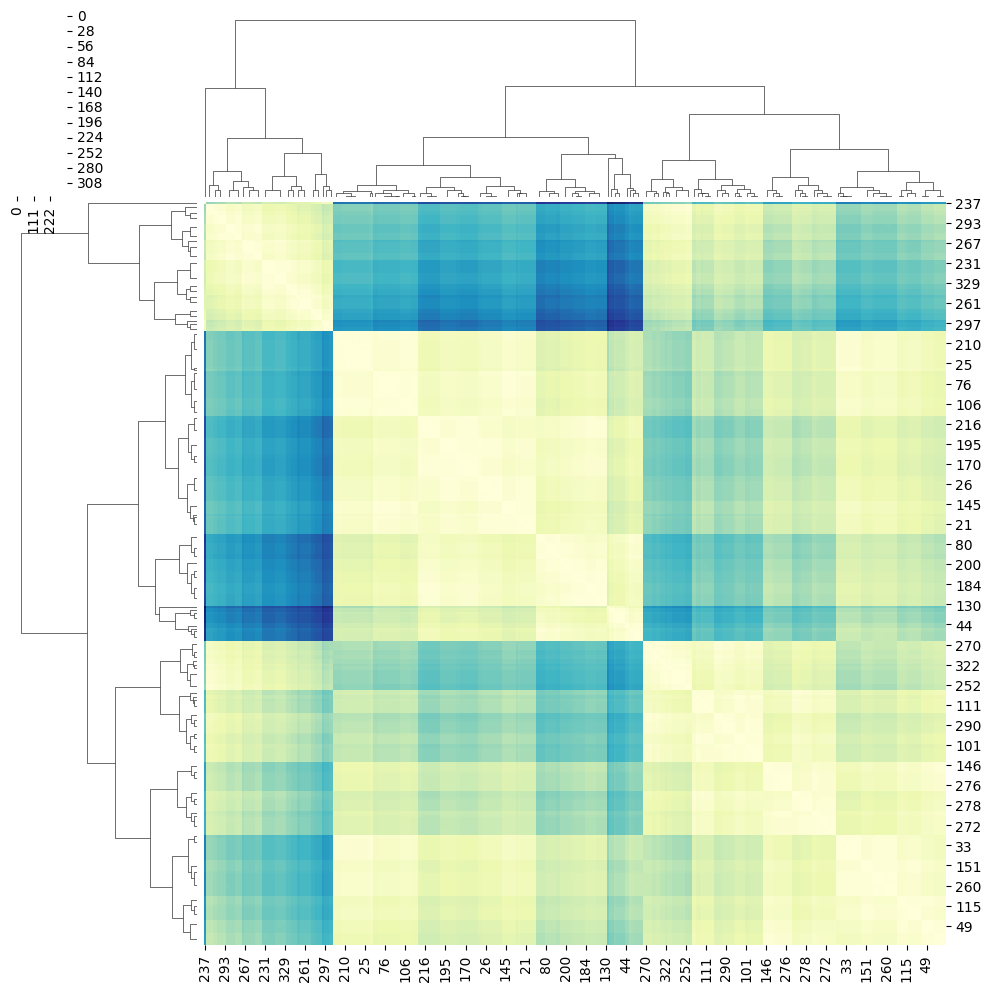

In [473]:
# Perform hierarchical clustering to get the linkage matrix
linkage = sns.clustermap(data_distance, cmap="YlGnBu", fmt=".1f", annot=False, method='average').dendrogram_row.linkage

# Reorder the data based on the hierarchical clustering
order = pd.DataFrame(linkage, columns=['cluster_1', 'cluster_2', 'distance', 'new_count']).index
reordered_data = data_num.reindex(index=order, columns=order)

# Optionally, you can add color bar
sns.heatmap(reordered_data, cmap="YlGnBu", fmt=".1f", cbar=False)
plt.show()

In [475]:
# Calculate the pairwise Euclidean distances
distance_std = distance.cdist(data_std, data_std,"euclidean")
print(distance_std[:5,:5].round(2))

[[0.   0.76 1.25 1.08 1.17]
 [0.76 0.   1.   1.28 1.66]
 [1.25 1.   0.   0.98 1.47]
 [1.08 1.28 0.98 0.   0.88]
 [1.17 1.66 1.47 0.88 0.  ]]


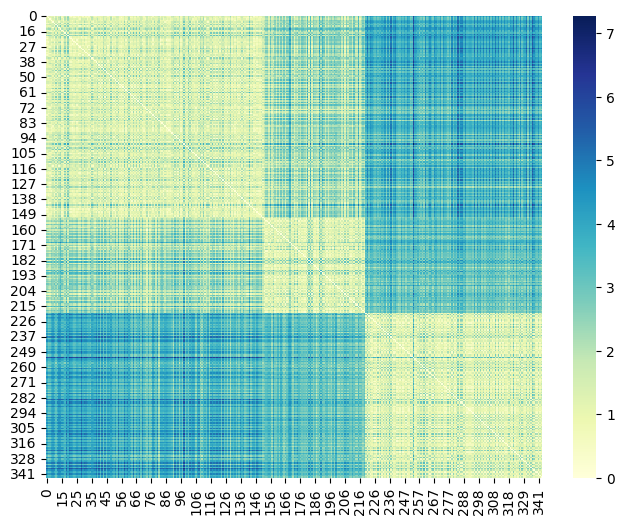

In [476]:
plt.figure(figsize=(8, 6))
data_std_distance = pd.DataFrame(distance_std, index = data_std.index, columns = data_num.index)
sns.heatmap(data_std_distance, annot=False, cmap="YlGnBu", fmt=".1f")
plt.show()

C:\Users\lrodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\lrodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
C:\Users\lrodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\lrodr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n

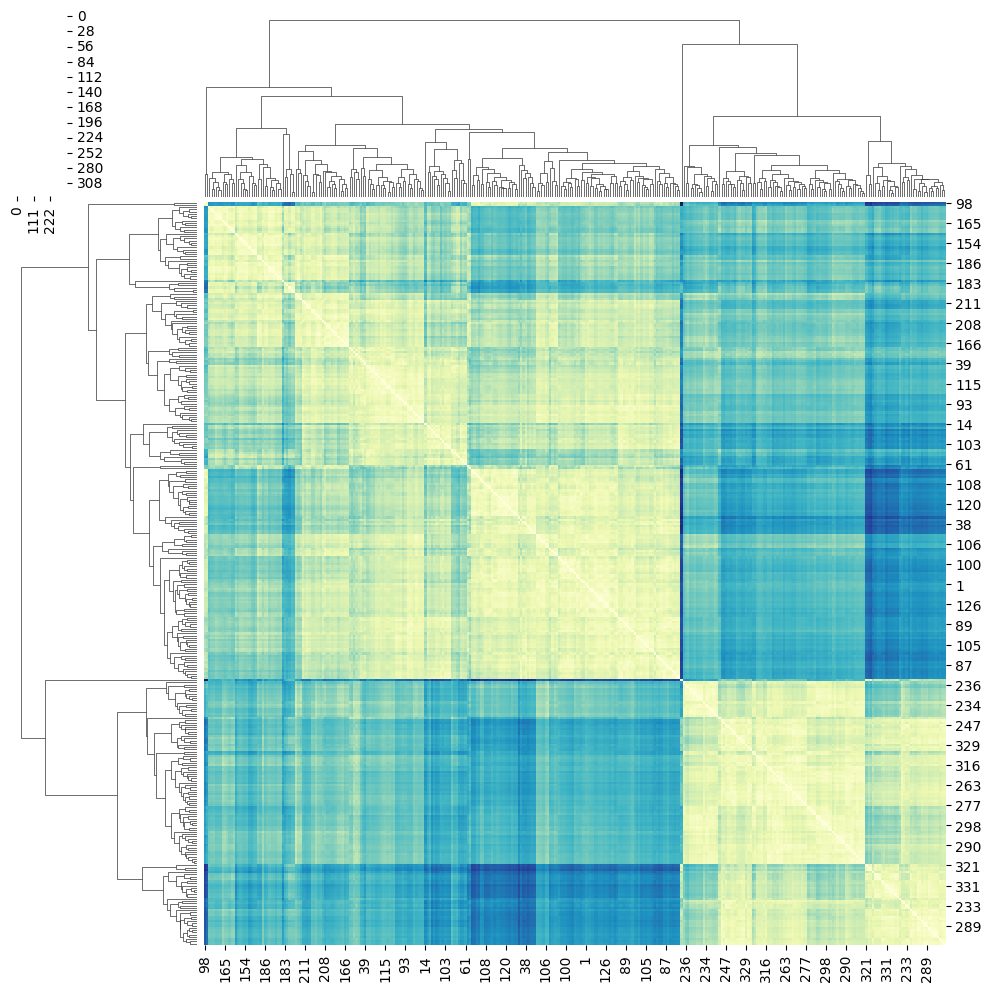

In [477]:
# Perform hierarchical clustering to get the linkage matrix
linkage = sns.clustermap(data_std_distance, cmap="YlGnBu", fmt=".1f", annot=False, method='average').dendrogram_row.linkage

# Reorder the data based on the hierarchical clustering
order = pd.DataFrame(linkage, columns=['cluster_1', 'cluster_2', 'distance', 'new_count']).index
reordered_data = data_num.reindex(index=order, columns=order)

# Optionally, you can add color bar
sns.heatmap(reordered_data, cmap="YlGnBu", fmt=".1f", cbar=False)
plt.show()

C:\Users\lrodr\AppData\Local\Temp\ipykernel_23392\1236895873.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(data_std_distance, method='ward')  # You can choose a different linkage method if needed


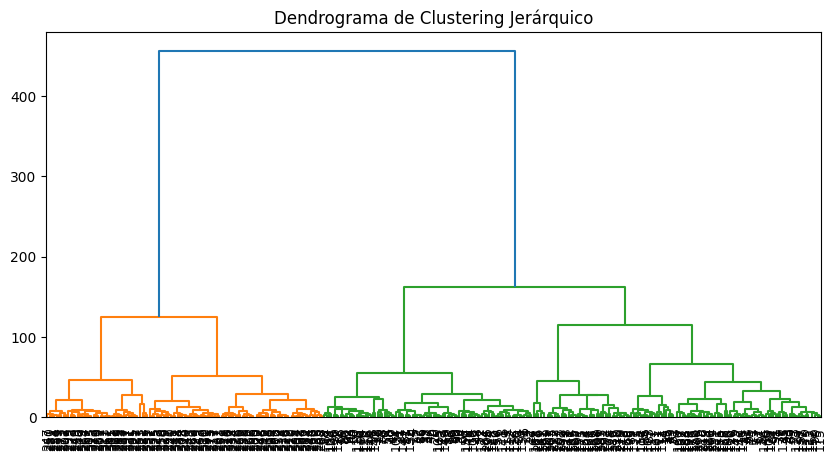

In [478]:
# Calculate the linkage matrix
linkage_matrix = sch.linkage(data_std_distance, method='ward')  # You can choose a different linkage method if needed
plt.figure(figsize=(10, 5))
# Create the dendrogram
dendrogram = sch.dendrogram(linkage_matrix, labels=data_std.index, leaf_font_size=9, leaf_rotation=90)

plt.title("Dendrograma de Clustering Jerárquico")
plt.show()

In [479]:
# Assign data points to 4 clusters
num_clusters = 2
cluster_assignments = sch.fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Display the cluster assignments
print("Cluster Assignments:", cluster_assignments)

# Display the dendrogram
plt.show()

Cluster Assignments: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [480]:
# Create a new column 'Cluster' and assign the 'cluster_assignments' values to it
datos['Cluster2'] = cluster_assignments

# Now 'df' contains a new column 'Cluster' with the cluster assignments

print(datos["Cluster2"])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


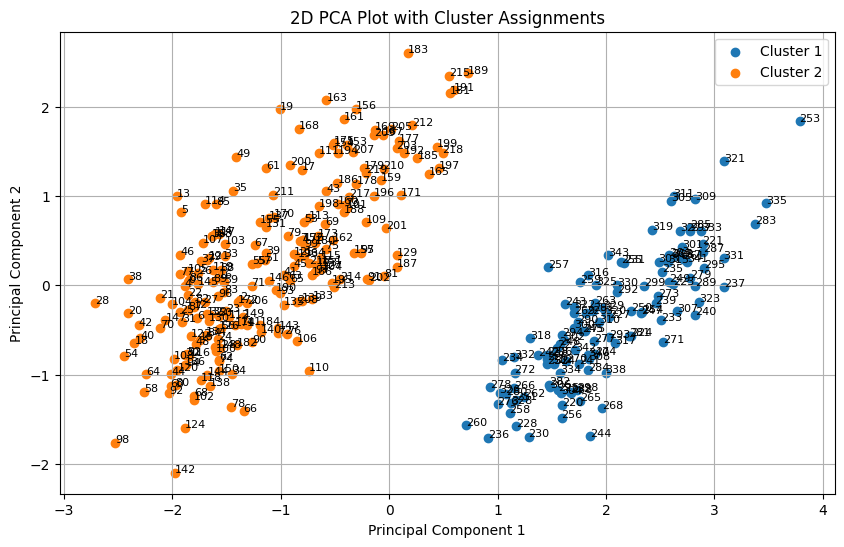

In [481]:

# Assuming 'df' is your original DataFrame with data
# 'cluster_assignments' contains cluster assignments

# Step 1: Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_std)

# Create a new DataFrame for the 2D principal components
data_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Step 2: Create a scatter plot with colors for clusters
plt.figure(figsize=(10, 6))

# Loop through unique cluster assignments and plot data points with the same color
for cluster in np.unique(cluster_assignments):
    plt.scatter(data_pca.loc[cluster_assignments == cluster, 'PC1'],
                data_pca.loc[cluster_assignments == cluster, 'PC2'],
                label=f'Cluster {cluster}')
# Add labels to data points
for i, row in data_pca.iterrows():
    plt.text(row['PC1'], row['PC2'], str(data_std.index[i]), fontsize=8)

plt.title("2D PCA Plot with Cluster Assignments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


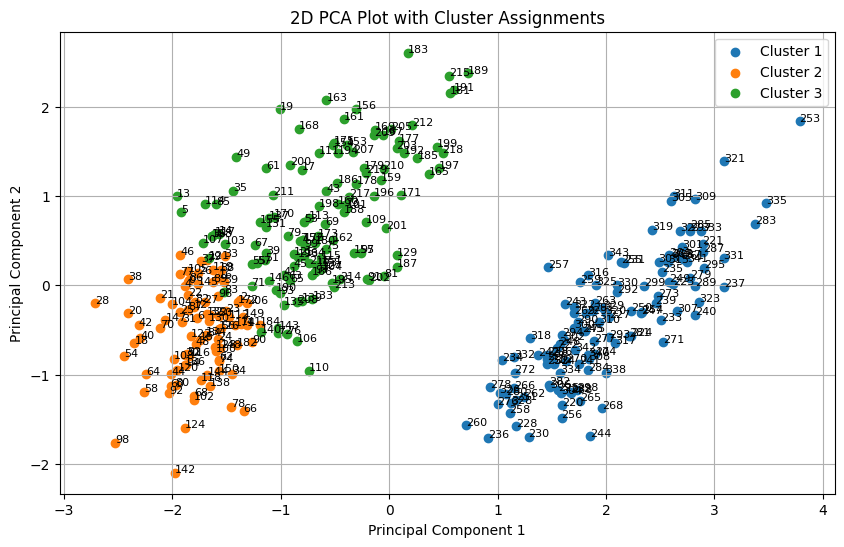

In [482]:
# Assign data points to 3 clusters
num_clusters = 3
cluster_assignments = sch.fcluster(linkage_matrix, num_clusters, criterion='maxclust')
datos['Cluster3'] = cluster_assignments

# Assuming 'df' is your original DataFrame with data
# 'cluster_assignments' contains cluster assignments

# Step 1: Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_std)

# Create a new DataFrame for the 2D principal components
data_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Step 2: Create a scatter plot with colors for clusters
plt.figure(figsize=(10, 6))

# Loop through unique cluster assignments and plot data points with the same color
for cluster in np.unique(cluster_assignments):
    plt.scatter(data_pca.loc[cluster_assignments == cluster, 'PC1'],
                data_pca.loc[cluster_assignments == cluster, 'PC2'],
                label=f'Cluster {cluster}')
# Add labels to data points
for i, row in data_pca.iterrows():
    plt.text(row['PC1'], row['PC2'], str(data_num.index[i]), fontsize=8)

plt.title("2D PCA Plot with Cluster Assignments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


CLUSTERING NO JERÁRQUICO

KMEANS

In [483]:

# Set the number of clusters (k=3)
k = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the KMeans model to your standardized data
kmeans.fit(data_std)

# Get the cluster labels for your data
kmeans_cluster_labels = kmeans.labels_

print(kmeans_cluster_labels)



[2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2 0 2 2 2 0
 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 0 2 0 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


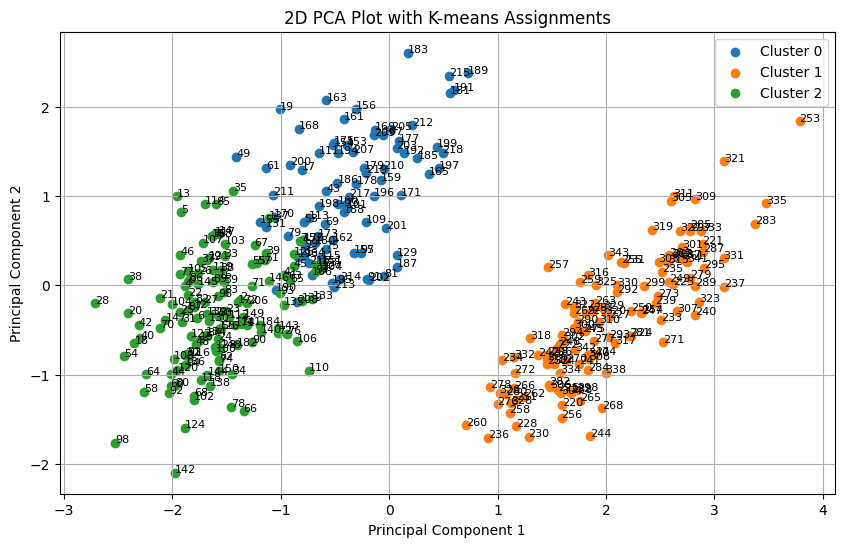

In [484]:
# Step 2: Create a scatter plot with colors for clusters
plt.figure(figsize=(10, 6))

# Loop through unique cluster assignments and plot data points with the same color
for cluster in np.unique(kmeans_cluster_labels):
    plt.scatter(data_pca.loc[kmeans_cluster_labels == cluster, 'PC1'],
                data_pca.loc[kmeans_cluster_labels == cluster, 'PC2'],
                label=f'Cluster {cluster}')
# Add labels to data points
for i, row in data_pca.iterrows():
    plt.text(row['PC1'], row['PC2'], str(data.index[i]), fontsize=8)

plt.title("2D PCA Plot with K-means Assignments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

DBSCAN

In [487]:

# Crear el modelo DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=2)

# Ajustar el modelo a los datos
dbscan.fit(data_std)

# Obtener las etiquetas de cluster asignadas por DBSCAN
dbscan_labels = dbscan.labels_
print(dbscan_labels)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [488]:


# Definir valores para eps y min_samples
eps_values = np.linspace(0.1, 1.0, 10)
min_samples_values = np.arange(2, 12)

# Inicializar variables para el número de clusters y los parámetros correspondientes
num_clusters_prev = None
eps_best = None
min_samples_best = None
num_iterations = 0

# Iterar sobre diferentes valores de eps y min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Crear el modelo DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Ajustar el modelo a los datos
        dbscan.fit(data_std)

        # Obtener el número de clusters
        num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)

        # Mostrar el número de clusters y los parámetros de DBSCAN si cambia el número de clusters
        if num_clusters != num_clusters_prev:
            print(f"Iteración {num_iterations + 1}: eps={eps}, min_samples={min_samples}, Número de clusters={num_clusters}")
            num_clusters_prev = num_clusters
            eps_best = eps
            min_samples_best = min_samples

        num_iterations += 1
        # Parar si se alcanzan las 100 iteraciones
        if num_iterations >= 100:
            break
    if num_iterations >= 100:
        break


Iteración 1: eps=0.1, min_samples=2, Número de clusters=0
Iteración 11: eps=0.2, min_samples=2, Número de clusters=25
Iteración 12: eps=0.2, min_samples=3, Número de clusters=2
Iteración 13: eps=0.2, min_samples=4, Número de clusters=0
Iteración 21: eps=0.30000000000000004, min_samples=2, Número de clusters=46
Iteración 22: eps=0.30000000000000004, min_samples=3, Número de clusters=22
Iteración 23: eps=0.30000000000000004, min_samples=4, Número de clusters=13
Iteración 24: eps=0.30000000000000004, min_samples=5, Número de clusters=3
Iteración 25: eps=0.30000000000000004, min_samples=6, Número de clusters=0
Iteración 31: eps=0.4, min_samples=2, Número de clusters=21
Iteración 32: eps=0.4, min_samples=3, Número de clusters=10
Iteración 34: eps=0.4, min_samples=5, Número de clusters=12
Iteración 35: eps=0.4, min_samples=6, Número de clusters=9
Iteración 36: eps=0.4, min_samples=7, Número de clusters=8
Iteración 37: eps=0.4, min_samples=8, Número de clusters=5
Iteración 38: eps=0.4, min_sa

In [489]:
# Crear el modelo DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Ajustar el modelo a los datos
dbscan.fit(data_std)

# Obtener las etiquetas de cluster asignadas por DBSCAN
dbscan_labels = dbscan.labels_
print(dbscan_labels)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1
 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  2 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1
 -1  2 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
  2 -1 -1 -1  2 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

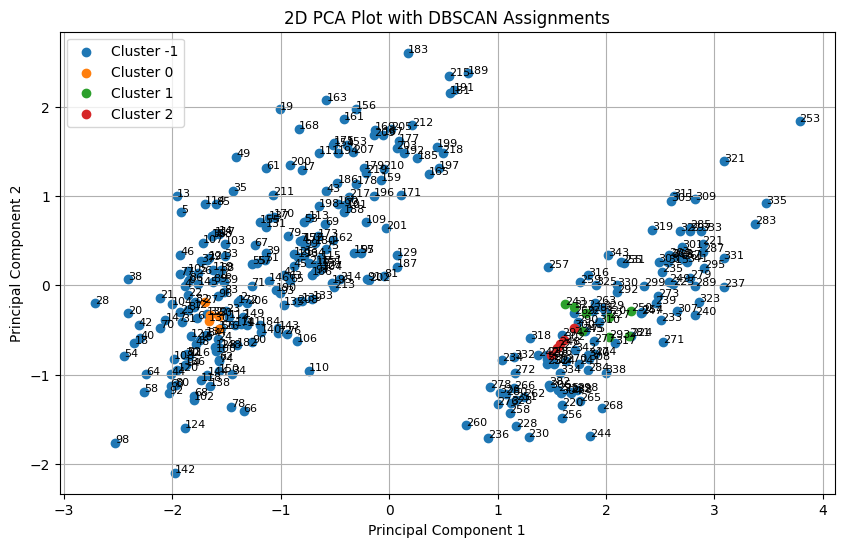

In [490]:
# Creating a scatter plot with colors for clusters
plt.figure(figsize=(10, 6))

# Loop through unique cluster assignments and plot data points with the same color
for cluster in np.unique(dbscan_labels):
    plt.scatter(data_pca.loc[dbscan_labels == cluster, 'PC1'],
                data_pca.loc[dbscan_labels == cluster, 'PC2'],
                label=f'Cluster {cluster}')
# Add labels to data points
for i, row in data_pca.iterrows():
    plt.text(row['PC1'], row['PC2'], str(data_num.index[i]), fontsize=8)

plt.title("2D PCA Plot with DBSCAN Assignments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

METODO DE ELBOW

In [491]:


#Create an array to store the WCSS values for different values of K:
wcss = []

for k in range(1, 11):  # You can choose a different range of K values
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

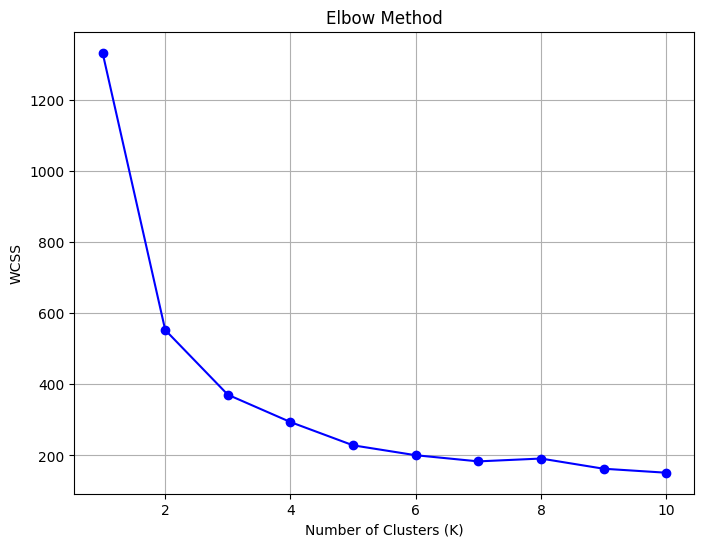

In [492]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

METODO DE LAS SILUETAS

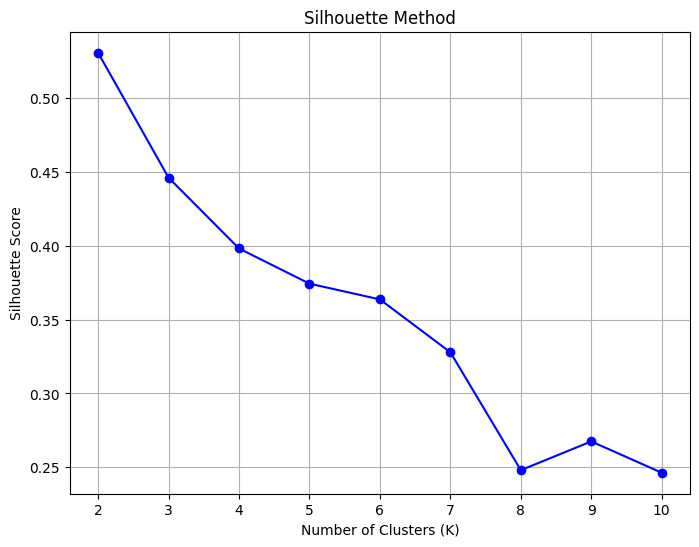

In [493]:


#Create an array to store silhouette scores for different values of K

silhouette_scores = []

#Run K-means clustering for a range of K values and calculate the silhouette score for each K:

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_std)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_std, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [494]:
# Assuming 'df_std_distance' is your standardized data and '4' is the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_std)
labels = kmeans.labels_

In [495]:
silhouette_values = silhouette_samples(data_std, labels)
silhouette_values

array([ 0.48709953,  0.49109643,  0.38732019,  0.49548036,  0.28434675,
        0.52914184,  0.14043449,  0.41791818,  0.2352181 ,  0.239343  ,
        0.58636559,  0.43769413,  0.12639473,  0.56674201,  0.26815692,
        0.48359533,  0.5309068 ,  0.5227126 ,  0.5205562 ,  0.48937501,
        0.5458217 ,  0.43813374,  0.45499919,  0.44072108,  0.36704438,
        0.45060548,  0.50713838,  0.52046838,  0.35341619,  0.51746518,
        0.12845578,  0.34453111,  0.31221922,  0.49202599,  0.22615621,
        0.56138558,  0.2721957 ,  0.55397671,  0.2393409 ,  0.52813758,
        0.226963  ,  0.37537388,  0.59309188,  0.027075  ,  0.52616882,
        0.29329028,  0.58532205,  0.05064232,  0.5286541 ,  0.30441714,
        0.54680012,  0.32493605,  0.48542446,  0.47052088,  0.55396825,
        0.01930467,  0.55516107,  0.26594217,  0.51426904,  0.24311629,
        0.47431796,  0.25145277,  0.51716624,  0.05431918,  0.52677789,
        0.44017389,  0.41004901,  0.3780492 ,  0.57212919,  0.05

C:\Users\lrodr\AppData\Local\Temp\ipykernel_23392\2404739174.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = plt.cm.get_cmap("Spectral")(float(i) / 3)


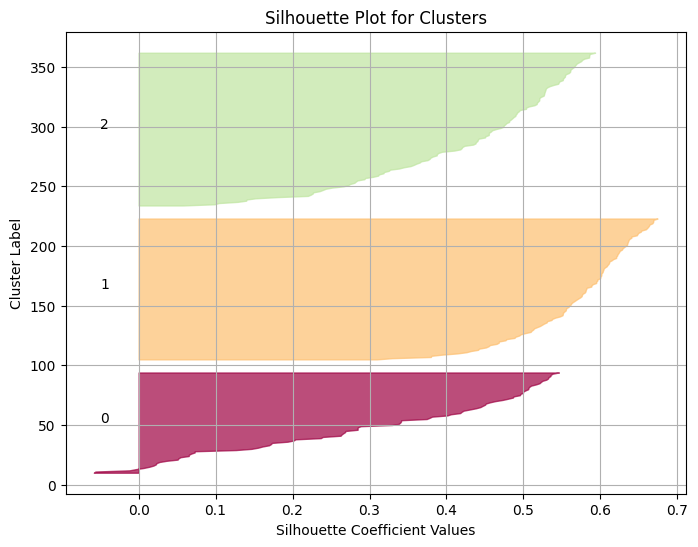

In [496]:
plt.figure(figsize=(8, 6))

y_lower = 10
for i in range(3):
    ith_cluster_silhouette_values = silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.get_cmap("Spectral")(float(i) / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette Plot for Clusters")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.grid(True)
plt.show()

In [497]:
# Add the labels as a new column to the DataFrame
data_std['label'] = labels
# Sort the DataFrame by the "label" column
data_std_sort = data_std.sort_values(by="label")
# Set the 'A' column as the index
data_std = data_std.set_index(data_num.index)
data_std_sort['label']

49    0
53    0
43    0
79    0
61    0
     ..
5     2
4     2
2     2
1     2
0     2
Name: label, Length: 333, dtype: int32

In [498]:
# Group the data by the 'label' column and calculate the mean of each group
cluster_centroids = data_std_sort.groupby('label').mean()
cluster_centroids.round(2)
# 'cluster_centroids' now contains the centroids of each cluster

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z
label,,,,
0,0.67,0.81,-0.29,-0.38
1,0.65,-1.10,1.16,1.10
2,-1.05,0.49,-0.88,-0.76


In [499]:
#Lo mismo pero con los datos originales
# Add the labels as a new column to the DataFrame
data_num['label'] = labels
# Sort the DataFrame by the "label" column
data_sort = data_num.sort_values(by="label")

# Group the data by the 'label' column and calculate the mean of each group
cluster_centroids_orig = data_sort.groupby('label').mean()
cluster_centroids_orig.round(2)
# 'cluster_centroids' now contains the centroids of each cluster

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,47.66,18.75,196.92,3898.24
1,47.57,15.00,217.24,5092.44
2,38.28,18.12,188.63,3593.80
